# __Aloe Ferox Machine Learning Algorithm__

__Importing tools and dictionaries__

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import pandas as pd 
from pandas import DataFrame, Series
import seaborn as sns
import urllib.request
from PIL import Image
import concurrent.futures
from collections import OrderedDict
import torch
import torch.utils
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.utils.data import Dataset
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import tensorflow as tf
import cv2
import requests
from io import BytesIO
from torch.utils.data import Dataset, DataLoader

import glob
import os


__Importing data from Excell spreadsheet__

In [2]:
Base_Aloe_Ferox_Dataset = pd.ExcelFile('BaseSet.xlsx')

__Splitting of the datasheets into seperate data frames__

In [3]:

Base_Set = {}
for sheet in Base_Aloe_Ferox_Dataset.sheet_names:
    df = Base_Aloe_Ferox_Dataset.parse(sheet)
    Base_Set[sheet] = df

flowers_base = Base_Set["FLOWERS"]
buds_base = Base_Set["BUDS"]
fruit_base = Base_Set["FRUIT"]
No_Evidence_Base = Base_Set["No Evidence"]

flowers_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,field:phenology (foa)
0,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
1,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
2,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
3,10790153,2011-08-14 00:00:00,2011-08-14,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2011-09-01 07:26:07 UTC,2018-06-07 16:13:47 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN
4,10799481,2012-05-26 00:00:00,2012-05-26,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2012-06-15 01:15:18 UTC,2018-08-26 12:02:52 UTC,...,Cape aloe,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN


In [4]:
buds_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,8154638,2017/04/30 7:56 AM EDT,2017-04-30,2017-04-30 11:56:00 UTC,Eastern Time (US & Canada),520,johnnybirder,Johnny Wilson,2017-09-28 16:43:38 UTC,2018-06-07 16:12:02 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,9272972,2007/07/01 9:41 AM BST,2007-07-01,2007-07-01 08:41:00 UTC,Europe/London,493784,mark185,Mark Wright,2017-12-27 13:16:33 UTC,2018-06-07 16:09:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,9865839,2017-06-24 3:22:22 PM SAST,2017-06-24,2017-06-24 13:22:22 UTC,Africa/Johannesburg,764003,gabriel_15,NaN,2018-02-15 07:32:45 UTC,2018-06-07 16:08:59 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10787160,2011-07-15 00:00:00,2011-07-15,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-07-18 12:28:39 UTC,2018-06-07 16:14:22 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10787636,2011-07-29 00:00:00,2011-07-29,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2011-08-02 01:09:32 UTC,2018-06-07 16:14:07 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [5]:
fruit_base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,9034202,2017/11/24 2:54 PM SAST,2017-11-24,2017-11-24 12:54:00 UTC,Africa/Johannesburg,389997,shauns,Shaun Swanepoel,2017-12-03 21:28:02 UTC,2018-08-26 11:58:10 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,10832079,2012-10-12 00:00:00,2012-10-12,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2012-11-30 08:16:37 UTC,2018-11-19 09:09:18 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,10871050,2013-07-17 00:00:00,2013-07-17,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2013-07-30 01:59:08 UTC,2018-11-19 09:09:51 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,10875477,2013-09-25 00:00:00,2013-09-25,NaN,Africa/Johannesburg,7682,nicky,Nicola van Berkel,2013-10-17 17:28:07 UTC,2018-11-19 09:08:12 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,10962203,2013-09-12 00:00:00,2013-09-12,NaN,Africa/Johannesburg,383144,tonyrebelo,Tony Rebelo,2014-05-03 23:49:34 UTC,2023-10-13 09:04:15 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


In [6]:
No_Evidence_Base.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_family_name,taxon_genus_name,taxon_species_name,taxon_subspecies_name,taxon_variety_name,field:phenology (foa)
0,11111885,2015-05-06 00:00:00,2015-05-06,NaN,Africa/Johannesburg,660426,outramps-tanniedi,Di Turner,2015-05-17 11:20:21 UTC,2023-05-26 11:54:43 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
1,11197854,2015-11-20 00:00:00,2015-11-20,NaN,Pretoria,711873,benjamin_walton,Benjamin Walton,2016-01-27 11:54:52 UTC,2024-05-27 09:40:27 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
2,11245126,2017-01-17 00:00:00,2017-01-17,NaN,Africa/Johannesburg,664422,lizegreenieza,Lize van der Merwe,2017-06-12 15:59:45 UTC,2023-09-06 10:04:38 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
3,20173194,2017-06-24 00:00:00,2017-06-24,NaN,Pretoria,389997,shauns,Shaun Swanepoel,2017-08-16 08:05:05 UTC,2023-09-06 10:04:34 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN
4,27389400,2015/01/07 4:23 AM PST,2015-01-07,2015-01-07 12:23:00 UTC,Pacific Time (US & Canada),1831095,douglasriverside,Douglas J. Long,2019-06-21 18:19:54 UTC,2020-10-11 11:04:47 UTC,...,Aloe ferox,Cape Aloe,Plantae,124412,Asphodelaceae,Aloe,Aloe ferox,NaN,NaN,NaN


__Function for detecting missing values__

In [7]:
def missing_values(df):
    print(f'Column\t\t\t% missing')
    print(f'{"-"}'*35) 
    return (df.isnull().sum()/len(df)*100
    ).astype(int)

missing_values(flowers_base)

Column			% missing
-----------------------------------


id                                    0
observed_on_string                    0
observed_on                           0
time_observed_at                      7
time_zone                             0
user_id                               0
user_login                            0
user_name                             4
created_at                            0
updated_at                            0
quality_grade                         0
license                               5
url                                   0
image_url                             0
sound_url                           100
tag_list                             93
description                          88
num_identification_agreements         0
num_identification_disagreements      0
captive_cultivated                    0
oauth_application_id                 88
place_guess                           0
latitude                              0
longitude                             0
positional_accuracy                  10


__Filtering of only useful attributes__

In [8]:
#all null columns or columns with 100% the same value have been removed
useful = ['id','observed_on','image_url','latitude','longitude','field:phenology (foa)']

flowers_one= flowers_base[useful]
buds_one = buds_base[useful]
fruit_one = fruit_base[useful]
No_Evidence_one = No_Evidence_Base[useful]

flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
fruit_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
No_Evidence_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_7200\2133672115.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flowers_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_7200\2133672115.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buds_one.rename(columns={'field:phenology (foa)':'phenology'}, inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_7200\2133672115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

__Replacing null label values with phenology classifications__

In [9]:
flowers_one["phenology"]=flowers_one["phenology"].fillna("Flowers")
buds_one["phenology"]=buds_one["phenology"].fillna("Buds")
fruit_one["phenology"]=fruit_one["phenology"].fillna("Fruit")
No_Evidence_one["phenology"]=No_Evidence_one["phenology"].fillna("No Evidence")

C:\Users\micha\AppData\Local\Temp\ipykernel_7200\331543464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flowers_one["phenology"]=flowers_one["phenology"].fillna("Flowers")
C:\Users\micha\AppData\Local\Temp\ipykernel_7200\331543464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buds_one["phenology"]=buds_one["phenology"].fillna("Buds")
C:\Users\micha\AppData\Local\Temp\ipykernel_7200\331543464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

__Dataset train test splitting__

In [10]:
from sklearn.model_selection import train_test_split

train_flowers, test_flowers = train_test_split(flowers_one, test_size=0.25, random_state=42)
train_buds, test_buds = train_test_split(buds_one, test_size=0.25, random_state=42)
train_fruit, test_fruit = train_test_split(fruit_one, test_size=0.25, random_state=42)
train_No_Evidence, test_No_Evidence = train_test_split(No_Evidence_one, test_size=0.25, random_state=42)

In [11]:
test_flowers.head()
#test_buds.head()
#test_fruit.head()
#test_No_Evidence.head()

,id,observed_on,image_url,latitude,longitude,phenology
453,173459251,2023-07-03,https://inaturalist-open-data.s3.amazonaws.com...,-29.681617,30.468153,Buds & Flowers
341,163657433,2023-05-24,https://inaturalist-open-data.s3.amazonaws.com...,-33.539844,23.101531,Flowers
177,52944019,2020-07-12,https://inaturalist-open-data.s3.amazonaws.com...,-33.442159,26.612050,Flowers
86,32337112,2015-07-10,https://inaturalist-open-data.s3.amazonaws.com...,-33.483333,25.750000,Flowers
332,137161855,2022-09-30,https://inaturalist-open-data.s3.amazonaws.com...,-33.712674,22.460219,Flowers


__Combining of seperate training data frames and test data frames__

In [12]:
Test_set = pd.concat([test_flowers, test_buds, test_fruit, test_No_Evidence], axis=0)
Train_set = pd.concat([train_flowers, train_buds, train_fruit, train_No_Evidence], axis=0)

Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 222 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1893 non-null   int64         
 1   observed_on  1893 non-null   datetime64[ns]
 2   image_url    1893 non-null   object        
 3   latitude     1893 non-null   float64       
 4   longitude    1893 non-null   float64       
 5   phenology    1893 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 103.5+ KB


In [13]:
missing_values(Train_set)

Column			% missing
-----------------------------------


id             0
observed_on    0
image_url      0
latitude       0
longitude      0
phenology      0
dtype: int64

__Dropping of null values__

In [14]:
Train_set = Train_set.dropna()

Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 222 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1893 non-null   int64         
 1   observed_on  1893 non-null   datetime64[ns]
 2   image_url    1893 non-null   object        
 3   latitude     1893 non-null   float64       
 4   longitude    1893 non-null   float64       
 5   phenology    1893 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 103.5+ KB


In [15]:
missing_values(Test_set)

Column			% missing
-----------------------------------


id             0
observed_on    0
image_url      0
latitude       0
longitude      0
phenology      0
dtype: int64

__Removing duplicate rows__

In [16]:
Train_set = Train_set.drop_duplicates()
Test_set = Test_set.drop_duplicates()

In [17]:
Train_set[Train_set.duplicated()]

,id,observed_on,image_url,latitude,longitude,phenology


In [18]:
print(Train_set.describe([x*0.1 for x in range(10)]))
print(Test_set.describe([x*0.1 for x in range(10)]))

                 id                    observed_on     latitude    longitude
count  1.766000e+03                           1766  1766.000000  1766.000000
mean   9.684270e+07  2020-10-31 16:26:38.187995392   -33.357067    24.386513
min    8.154638e+06            1996-07-22 00:00:00   -34.454789    17.954658
0%     8.154638e+06            1996-07-22 00:00:00   -34.454789    17.954658
10%    2.926031e+07            2018-09-13 00:00:00   -34.169949    21.174461
20%    3.767568e+07            2019-09-01 00:00:00   -34.009850    21.860310
30%    5.146136e+07            2020-05-31 00:00:00   -33.729723    22.173261
40%    5.835307e+07            2020-07-19 00:00:00   -33.504402    22.642811
50%    8.186650e+07            2021-04-01 00:00:00   -33.459161    23.866608
60%    1.234903e+08            2022-03-07 00:00:00   -33.394626    26.309395
70%    1.417450e+08            2022-10-28 00:00:00   -33.316261    26.540599
80%    1.709759e+08            2023-06-21 00:00:00   -33.156960    26.644670

__Longitude and latitude data analysis__

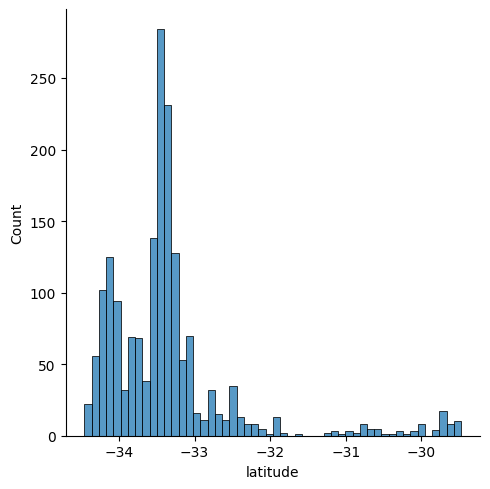

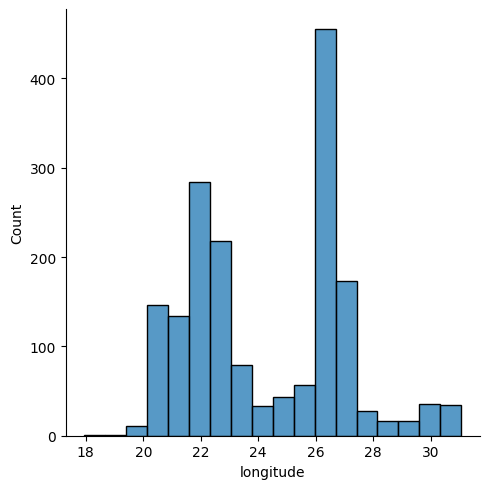

In [19]:
sns.displot(data =Train_set['latitude'])
sns.displot(data =Train_set['longitude'])

__Data analysis: Phenological stages over the months of the year__

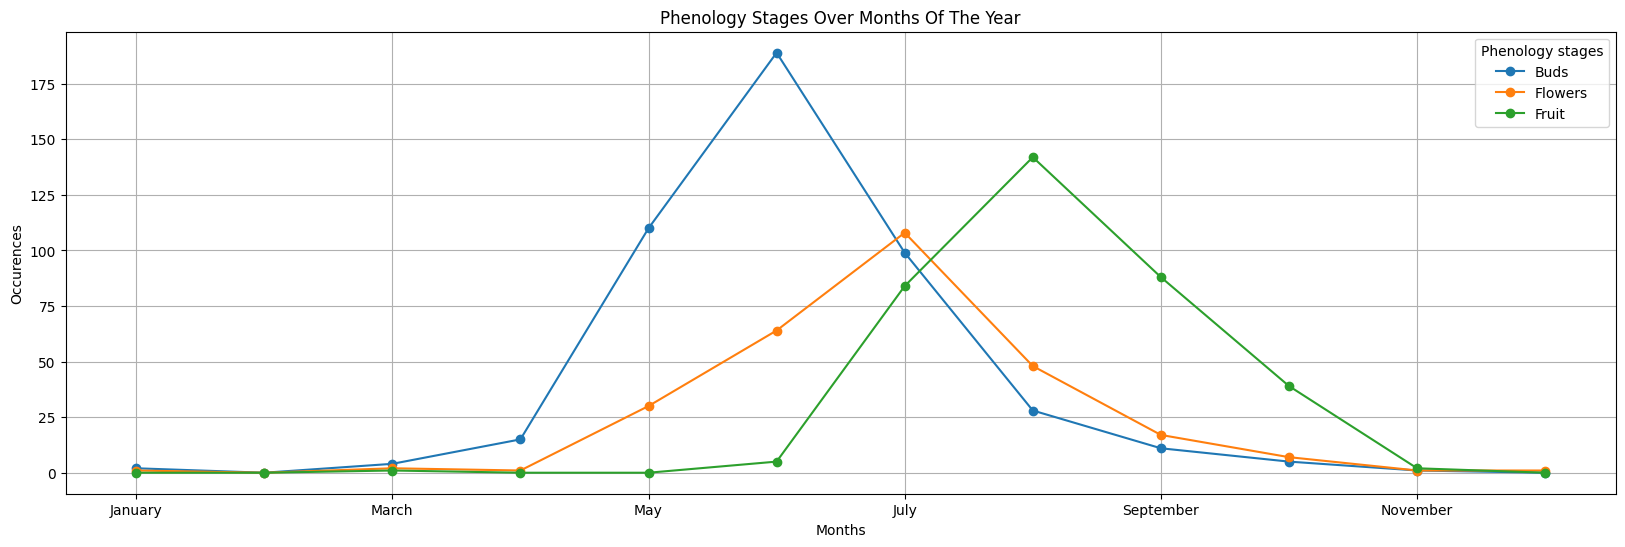

In [20]:
Train_set["month"] = pd.to_datetime(Train_set["observed_on"]).dt.month_name()
filteredDF = Train_set[Train_set["phenology"].isin(["Flowers","Buds","Fruit"])]
groupedDF = filteredDF.groupby(["month", "phenology"]).size().reset_index(name="count")

pivot = groupedDF.pivot(index="month", columns="phenology", values="count").fillna(0)
pivot = pivot.reindex(
    ["January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"],
    fill_value=0
)

pivot.plot(kind="line", marker="o", figsize=(20, 6))

plt.title("Phenology Stages Over Months Of The Year")
plt.xlabel("Months")
plt.ylabel("Occurences")
plt.legend(title="Phenology stages")
plt.grid()
plt.show()

In [21]:
print(Test_set.index)

Index([453, 341, 177,  86, 332, 140, 272, 296, 101, 518,
       ...
        83, 278, 448,  79,  23, 287, 301, 280, 244, 290],
      dtype='int64', length=622)


__Resetting scrambled dataset indexes__

In [22]:
Train_set = Train_set.reset_index(drop=True)
Test_set = Test_set.reset_index(drop=True)

In [23]:
Test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           622 non-null    int64         
 1   observed_on  622 non-null    datetime64[ns]
 2   image_url    622 non-null    object        
 3   latitude     622 non-null    float64       
 4   longitude    622 non-null    float64       
 5   phenology    622 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 29.3+ KB


In [24]:
missing_values(Train_set)

Column			% missing
-----------------------------------


id             0
observed_on    0
image_url      0
latitude       0
longitude      0
phenology      0
month          0
dtype: int64

In [25]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1766 non-null   int64         
 1   observed_on  1766 non-null   datetime64[ns]
 2   image_url    1766 non-null   object        
 3   latitude     1766 non-null   float64       
 4   longitude    1766 non-null   float64       
 5   phenology    1766 non-null   object        
 6   month        1766 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 96.7+ KB


In [26]:
lastTrain_set = Train_set[['observed_on','image_url','phenology']].copy()
lastTest_set = Test_set[['observed_on','image_url','phenology']].copy()
lastTrain_set.head()

,observed_on,image_url,phenology
0,2020-07-26,https://inaturalist-open-data.s3.amazonaws.com...,Flowers
1,2023-08-18,https://inaturalist-open-data.s3.amazonaws.com...,Flowers
2,2023-06-24,https://inaturalist-open-data.s3.amazonaws.com...,Buds & Flowers
3,2023-08-06,https://static.inaturalist.org/photos/30802637...,Flowers
4,2020-07-12,https://inaturalist-open-data.s3.amazonaws.com...,Flowers


__Image download function__

In [27]:
def download_images(row, folder):
    url = row['image_url']
    filename = f"{row.name}.png"  # Give each image a filename that is formed from the corresponding index
    file_path = os.path.join(folder, filename)# Join the directory and file name
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # reports on successful downloads
        image = Image.open(BytesIO(response.content))
        image.save(file_path) #store the image in the folder
        return (file_path, row["phenology"])
    except Exception as e:
        print(f"Error downloading image at {url}: {e}") #error message for failed dowloads
        return (None, row["phenology"]) #return empty image path if the image could not be downloaded

__Function for downloading the images concurrently__

In [28]:
from concurrent.futures import ThreadPoolExecutor

def fast_download(dataframe, folder, max_workers=8):
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = list(executor.map(lambda row: download_images(row, folder), [row for _, row in dataframe.iterrows()]))#implements download_images on each row
    
    dataframe["image"] = [result[0] for result in results]  # Store the file paths in the data frame
    dataframe["phenology"] = [result[1] for result in results]  # Store the corresponding label as well

    return dataframe

In [29]:
lastTrain_set = fast_download(lastTrain_set, "Train")

Error downloading image at https://static.inaturalist.org/photos/218952263/medium.jpeg: 403 Client Error: Forbidden for url: https://static.inaturalist.org/photos/218952263/medium.jpeg
Error downloading image at https://static.inaturalist.org/photos/232649195/medium.jpeg: 403 Client Error: Forbidden for url: https://static.inaturalist.org/photos/232649195/medium.jpeg
Error downloading image at https://static.inaturalist.org/photos/254984346/medium.jpeg: 403 Client Error: Forbidden for url: https://static.inaturalist.org/photos/254984346/medium.jpeg
Error downloading image at https://static.inaturalist.org/photos/218864170/medium.jpeg: 403 Client Error: Forbidden for url: https://static.inaturalist.org/photos/218864170/medium.jpeg
Error downloading image at https://static.inaturalist.org/photos/273455250/medium.jpeg: 403 Client Error: Forbidden for url: https://static.inaturalist.org/photos/273455250/medium.jpeg


In [30]:
lastTest_set = fast_download(lastTest_set, "Test")

In [31]:
print(lastTrain_set.head())
print(lastTest_set.head())

  observed_on                                          image_url  \
0  2020-07-26  https://inaturalist-open-data.s3.amazonaws.com...   
1  2023-08-18  https://inaturalist-open-data.s3.amazonaws.com...   
2  2023-06-24  https://inaturalist-open-data.s3.amazonaws.com...   
3  2023-08-06  https://static.inaturalist.org/photos/30802637...   
4  2020-07-12  https://inaturalist-open-data.s3.amazonaws.com...   

        phenology        image  
0         Flowers  Train\0.png  
1         Flowers  Train\1.png  
2  Buds & Flowers  Train\2.png  
3         Flowers  Train\3.png  
4         Flowers  Train\4.png  
  observed_on                                          image_url  \
0  2023-07-03  https://inaturalist-open-data.s3.amazonaws.com...   
1  2023-05-24  https://inaturalist-open-data.s3.amazonaws.com...   
2  2020-07-12  https://inaturalist-open-data.s3.amazonaws.com...   
3  2015-07-10  https://inaturalist-open-data.s3.amazonaws.com...   
4  2022-09-30  https://inaturalist-open-data.s3.amazo

In [32]:
processedDF = lastTrain_set.drop(columns='image_url')
lastTest_set = lastTest_set.drop(columns='image_url')

In [33]:
print(processedDF.head())
print(lastTest_set.head())

  observed_on       phenology        image
0  2020-07-26         Flowers  Train\0.png
1  2023-08-18         Flowers  Train\1.png
2  2023-06-24  Buds & Flowers  Train\2.png
3  2023-08-06         Flowers  Train\3.png
4  2020-07-12         Flowers  Train\4.png
  observed_on       phenology       image
0  2023-07-03  Buds & Flowers  Test\0.png
1  2023-05-24         Flowers  Test\1.png
2  2020-07-12         Flowers  Test\2.png
3  2015-07-10         Flowers  Test\3.png
4  2022-09-30         Flowers  Test\4.png


__Drop records where images failed downloading__

In [34]:
processedDF = processedDF.dropna()
lastTest_set = lastTest_set.dropna()
len(processedDF)

1761

__Map for the encoding of the label data__

In [35]:
label_map = {
    'Flowers': 0,
    'Buds': 1,
    'Fruit': 2,
    'No Evidence': 3,
    'Buds & Flowers': 4,
    'Flowers & Buds': 5,
    'Flowers & Fruit': 6,
    'Flower, Buds & Fruit': 7
}

In [36]:
processedDF["phenology"] = processedDF["phenology"].map(label_map).astype(int) #convert the encoding to integers
lastTest_set["phenology"] = lastTest_set["phenology"].map(label_map).astype(int)
processedDF.head()

,observed_on,phenology,image
0,2020-07-26,0,Train\0.png
1,2023-08-18,0,Train\1.png
2,2023-06-24,4,Train\2.png
3,2023-08-06,0,Train\3.png
4,2020-07-12,0,Train\4.png


__Class creation for image preprocessing methods__

In [37]:

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), #randomly flip images horizontally
    transforms.RandomRotation(degrees=15), #randomly rotate images by 15 degrees
    transforms.Resize((224, 224)), #resize all images to a consistent size
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), #randomly change the colour values of images
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class TransformImages(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        path = self.dataframe.iloc[idx]['image']
        label = self.dataframe.iloc[idx]['phenology']
        image = Image.open(path).convert("RGB") #load the image from the folder
        if self.transform:
            image = self.transform(image) #make the transformations

        label = torch.tensor(label, dtype=torch.long)
        
        return image, label

dataset = TransformImages(dataframe=processedDF, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

__Setting the device used for training__

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #use the cpu if a gpu is not found

__Class definition for model structure and architecture__

In [39]:
class SingleLabelCNN(nn.Module):
    def __init__(self, num_classes): #number of possible labels
        super(SingleLabelCNN, self).__init__()
        self.base_model = models.resnet18(pretrained=True) #using a base pretrained model called resnet18
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        return nn.functional.log_softmax(x, dim=1)  # softmax is used for single label models


In [40]:
num_classes = processedDF["phenology"].nunique()  # Number of unique classes in the processedDF
model = SingleLabelCNN(num_classes).to(device)

c:\Users\micha\OneDrive\Documents\GitHub\AloeFeroxAlgorithm\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\micha\OneDrive\Documents\GitHub\AloeFeroxAlgorithm\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


__Defining loss, optimizer, and scheduler__

In [41]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy used for single-label classification with exclusive classes to calculate loss
optimizer = optim.Adam(model.parameters(), lr=0.001) #updates model parameters during training to prevent loss
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1) #used to decrease the learning rate after 10 epochs

__Model training loop__

In [42]:
epochs = 27 #amount of times the model will train over the data
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for image, label in dataloader:
        image = image.to(device)
        label = label.to(device)
        
        optimizer.zero_grad() #resets the image gradients
        outputs = model(image)
        loss = criterion(outputs, label) #calculates the loss value
        
        loss.backward()
        optimizer.step() #updates parameters
        
        running_loss += loss.item()
    
    scheduler.step() #changes the learning rate after every 10 epochs
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(dataloader):.4f}")

Epoch [1/27], Loss: 1.4413
Epoch [2/27], Loss: 1.1466
Epoch [3/27], Loss: 1.1595
Epoch [4/27], Loss: 1.0592
Epoch [5/27], Loss: 1.0517
Epoch [6/27], Loss: 0.9808
Epoch [7/27], Loss: 0.9359
Epoch [8/27], Loss: 0.9004
Epoch [9/27], Loss: 0.8063
Epoch [10/27], Loss: 0.7567
Epoch [11/27], Loss: 0.6470
Epoch [12/27], Loss: 0.5971
Epoch [13/27], Loss: 0.6224
Epoch [14/27], Loss: 0.5754
Epoch [15/27], Loss: 0.5240
Epoch [16/27], Loss: 0.5311
Epoch [17/27], Loss: 0.5310
Epoch [18/27], Loss: 0.4621
Epoch [19/27], Loss: 0.4394
Epoch [20/27], Loss: 0.4429
Epoch [21/27], Loss: 0.4004
Epoch [22/27], Loss: 0.3670
Epoch [23/27], Loss: 0.3651
Epoch [24/27], Loss: 0.3697
Epoch [25/27], Loss: 0.3806
Epoch [26/27], Loss: 0.3657
Epoch [27/27], Loss: 0.3618


__Testing accuracy on the training dataset__

In [43]:
model.eval()
num_correct = 0
total = 0

with torch.no_grad():# Turn off image gradients
    for images, labels in dataloader:
        images = images.to(device) # transfer the data to the available device
        labels = labels.to(device)

        outputs = model(images)# get the predictions
        _, predicted = torch.max(outputs, 1) #holds the predicted class for each image
        total += labels.size(0) #counts the amount of predictions in the batch
        num_correct += (predicted == labels).sum().item() #counts the amount of correct predictions

accuracy = 100 * num_correct / total# Calculate the accuracy score
print(f'Accuracy of the model on the train dataset: {accuracy:.2f}%')

Accuracy of the model on the train dataset: 87.68%


__Save model to torch file__

In [44]:
torch.save(model, 'aloe_model2.pth')

__Load model from torch file__

In [45]:
loaded_model = torch.load('aloe_model2.pth')
loaded_model.eval()

C:\Users\micha\AppData\Local\Temp\ipykernel_7200\604020564.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('aloe_model2.pth')


SingleLabelCNN(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

__Preprocessing function for images__

In [46]:
def preprocess_image(image_path, target_size=(224, 224)):
    transform = transforms.Compose([
        transforms.Resize(target_size), #converts to standard image size
        transforms.ToTensor(),  #Converts the image to a Pytorch tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path)
    tensor = transform(image).unsqueeze(0) #indicates that the image is a batch size of 1
    return tensor


__Predicting on a single image__

In [47]:
image_path = 'Test/390.png' #image file path
tensor_image = preprocess_image(image_path, target_size=(224, 224)) #process the image before prediction

with torch.no_grad():  # Disable the gradient tracking for faster prediction
    output = loaded_model(tensor_image) #load the image into the trained model 
    prediction = torch.argmax(output, dim=1).item() #predict the class

print(f'Predicted class: {prediction}')


Predicted class: 0


__Accuracy score of the test dataset__

In [70]:
correct_outputs = 0

for _, row in lastTest_set.iterrows():
    img_tensor = preprocess_image(row['image']) #process the image
    
    with torch.no_grad():  # remove the gradients
        output = loaded_model(img_tensor) #load image into model
        classification = torch.argmax(output, dim=1).item() #predict the class

    if classification == row['phenology']: #check if the prediction is the same as the true label
        correct_outputs += 1 #increase the counter by 1

accuracy = correct_outputs / len(lastTest_set) #accuracy score calculation
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 67.36%
